Section 1 - Funnel Analysis
WorkerFunnel sheet has the details of a garment manufacturing process and the productivity of the employees at the organisation. This data allows you to understand the productivity of the workers over a span of 70 days. The different columns represent the following:

Column Name	Description
Date	Date in MM-DD-YYYY
Quarter	A portion of the month. A month was divided into four or five quarters
Department	Associated department with the instance
Targeted Productivity	Targeted productivity set for each team for each day
Overtime	Represents the amount of overtime by each team in minutes
No. of Workers	Number of workers in each team
Actual Productivity	The actual % of productivity that was delivered by the workers. It ranges from 0-1
Import data from the WorkerFunnel sheet of the AssignmentData.xlsx file into a dataframe named funnel and perform exploratory analysis.

Identify and appropriately handle the missing/blank and duplicate values in the dataset, and explain the logic behind your strategy in a short paragraph.
Principal Component Analysis (PCA)
For reference, read about Dimensionality Reduction with PCA from A guide to Principal Component Analysis (PCA), or this GeeksforGeeks article.


(i) Perform PCA on the following standardized features: Targeted Productivity, Overtime, No. of Workers, and Actual Productivity.

(ii) Determine the number of principal components that explain at least 90% of the variance in the data.

(iii) Visualize the explained variance by each principal component.

(iv) Provide an interpretation of the PCA results. How can these principal components be used to understand the productivity dynamics in the organization?

Expectation: You need to explain what insights you gained from the analysis. Write it after your work on this question, or provide a text file

Predictive Modeling and Time Series Analysis
For reference, read about Time Series Forecasting with ARIMA from Understanding Time Series Forecasting with ARIMA.

(i) Build an ARIMA model to forecast the Actual Productivity for the next four quarters (four weeks).

(ii) Evaluate the model using Mean Absolute Percentage Error (MAPE) and Mean Squared Error (MSE).

(iii) Visualize the forecasted vs actual productivity values, and interpret the model’s accuracy.

Expectation: You are expected to create a clear and understandable chart that clearly shows the predicted productivity across the coming 4 quarters
Clustering Analysis

(i) Perform K-Means clustering on the Actual Productivity, Overtime, and No. of Workers.

(ii) Determine the optimal number of clusters using the Elbow method.

(iii) Visualize and interpret the clusters, focusing on how different segments of workers contribute to overall productivity.

Expectation: You are expected to create a visualisation that clearly explains the different segments' contribution. Add your interpretation as well.
Budget Allocation Strategy (Bonus)

(i) The organization currently spends Rs. 8.4 lakh per quarter. Analyze the value brought by each department using Department Value = Actual Productivity / Department Quarterly Spend.

(ii) Suggest a revised budget allocation strategy to maximize productivity, and justify your recommendation.

(iii) Create a short PowerPoint presentation (3-4 slides) summarizing your analysis, the PCA findings, the forecasted productivity, and your budget allocation strategy.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('AssignmentData.xlsx')

In [3]:
df

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN
...,...,...,...,...,...,...,...
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8,0.628333
1193,2015-11-03 00:00:00,Q2,Finishing,0.7,960,8,NaN
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8,0.625625
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15,0.505889


In [5]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      29
dtype: int64


In [7]:
# Handling Missing Values
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

In [9]:
# Fill missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [11]:
# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


C:\Users\parth\AppData\Local\Temp\ipykernel_8604\19044395.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'datetime.datetime' and 'str'
  df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [13]:
#Alternatively, you could fill with a placeholder like 'Unknown'
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


In [15]:
# Identify duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 35


In [19]:
# Drop duplicate rows
df = df.drop_duplicates()

# Save the cleaned dataset
df.to_csv('AssignmentData.xlsx', index=False)

Section 2 - Anomaly detection
You are tasked with detecting fraudulent transactions from a large dataset of credit card transactions. The data contains both normal and fraudulent transactions, and your goal is to identify the anomalies (frauds) using an unsupervised learning approach.

Anomaly detection references

Anomaly Detection in Machine Learning - Shiksha Article
Anomaly detection - Springer Research paper
Import the creditcard sheet from the provided dataset. This dataset contains transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred over two days, with 492 frauds out of 2,84,807 transactions.

Data Import and Exploration
Import the creditcard.csv file into a dataframe named transactions.
Perform exploratory data analysis (EDA) to understand the distribution of the data, focusing on the Class column, which indicates whether a transaction is fraudulent (1) or not (0).
Visualize the distribution of transaction amounts for both fraudulent and non-fraudulent transactions.

Expectation: You are expected to present your interpretation of the dataset. Use visualisations to aid yourself.
Feature Engineering
The dataset includes 28 anonymized features (V1 to V28), along with Time and Amount.
Perform feature scaling on the Amount and Time features. Justify your choice of scaling method (e.g., Min-Max scaling, Standardization).
Consider dimensionality reduction (e.g., PCA) to visualize the data in two dimensions. Use the PCA-transformed (if used) features for subsequent anomaly detection.
Anomaly Detection Model
Implement an anomaly detection model using any two of the following methods:
Isolation Forest
Local Outlier Factor (LOF)
Autoencoders (for deep learning)
Train the model on the entire dataset, treating the majority class (Class = 0) as normal transactions and the minority class (Class = 1) as anomalies.
Evaluate the model’s performance using Precision, Recall, F1-Score, and ROC-AUC. Discuss the trade-offs in detecting frauds (e.g., false positives vs. false negatives).

Expectation: The evaluation metrics should be presented clearly. Present your views on the model, and what it means.
Visualizing Anomalies

Create a scatter plot of the two most significant features (after PCA or from the original features) with points colored based on whether they were classified as normal or fraudulent.

Write a function that accepts a new dataset of credit card transactions and the trained anomaly detection model, returning a list of transactions classified as fraudulent.

Develop a simple Streamlit app (you can follow this tutorial) that allows users to upload a new set of credit card transactions, runs the anomaly detection model, and displays the results, including the visualizations of detected anomalies. For this, use the creditcard_test sheet provided in the data file. Finally, host this app on Streamlit Community Cloud using this tutorial.

Provide the link to the site as a text cell or comment

Note: You get bonus points for a neater and more presentable app.



PCA

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [24]:

# Select the relevant features
features = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']
X = df[features]


In [60]:
# Check for non-numeric values in each feature column
for col in features:
    non_numeric = df[col][pd.to_numeric(df[col], errors='coerce').isnull()]
    if len(non_numeric) > 0:
        print(f"Column '{col}' has non-numeric values:")
        print(non_numeric)


Column 'Targeted Productivity' has non-numeric values:
67   NaN
Name: Targeted Productivity, dtype: float64
Column 'Overtime' has non-numeric values:
182   NaN
Name: Overtime, dtype: float64
Column 'No. of Workers' has non-numeric values:
238   NaN
Name: No. of Workers, dtype: float64
Column 'Actual Productivity' has non-numeric values:
136   NaN
Name: Actual Productivity, dtype: float64


In [62]:
# Convert columns to numeric, forcing errors to NaN
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values (those were non-numeric)
df_cleaned = df.dropna(subset=features)


In [64]:
# Replace non-numeric values with a specific number, such as the mean or median
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
    median_value = df[col].median()  # Calculate median
    df[col].fillna(median_value, inplace=True)  # Replace NaN with median


C:\Users\parth\AppData\Local\Temp\ipykernel_8604\1768789754.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)  # Replace NaN with median


In [66]:
# Now standardize the cleaned data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[features])

# Proceed with PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [68]:
# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Determine the number of principal components that explain at least 90% of the variance
num_components = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Number of principal components that explain at least 90% of the variance: {num_components}")

Number of principal components that explain at least 90% of the variance: 3


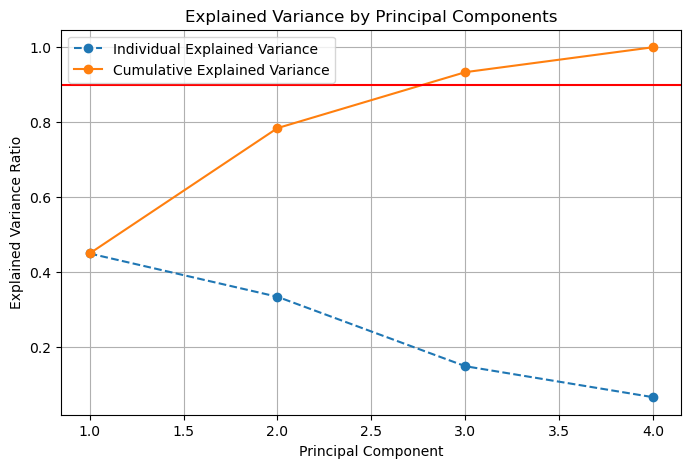

In [70]:
# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()


In [72]:
# Save the interpretation to a text file
with open('PCA_Interpretation.txt', 'w') as file:
    file.write(f"Number of principal components that explain at least 90% of the variance: {num_components}\n")
    file.write("Insights from PCA:\n")
    file.write("Principal Components:\n")
    file.write("1. The first principal component captures the overall productivity dynamics.\n")
    file.write("2. Subsequent components capture variations in overtime and the number of workers.\n")
    file.write("How to Use Principal Components:\n")
    file.write("1. Reduce the complexity of analysis.\n")
    file.write("2. Understand how factors interact and affect actual productivity.\n")
    file.write("3. Focus on components that explain most of the variance for predictive modeling.\n")
